# Pre Masters Maths 6601PMEC

## Examples of Using SymPy for Differential Calculus

1.  Differentiate the following functions  
  
  a)  $y = 5x^4 + 4x - \dfrac{1}{2x^2} - \dfrac{1}{\sqrt{x}} -3$

In [1]:
from sympy import *
x, y, z, t = symbols('x y z t')

In [2]:
diff( 5*x**4 + 4*x - 1/(2*x**2) - 1/sqrt(x) - 3 )

20*x**3 + 4 + x**(-3) + 1/(2*x**(3/2))

  m)  $\dfrac{4e^{6x}}{\sin(x)}$

In [3]:
diff( 4*exp(6*x)/sin(x) )

24*exp(6*x)/sin(x) - 4*exp(6*x)*cos(x)/sin(x)**2

In [4]:
factor( diff( 4*exp(6*x)/sin(x) ) )

-4*(-6*sin(x) + cos(x))*exp(6*x)/sin(x)**2

2.  Find the gradient of the curve $y = 4x^3 - 3x^2 + 2x -4$ at the points $(0, -4)$ and $(1, -1)$. 

In [5]:
dydx = diff( 4*x**3 - 3*x**2 + 2*x -4 )
dydx

12*x**2 - 6*x + 2

The gradient at $x=0$ is

In [6]:
dydx.subs(x, 0)

2

The gradient at $x=1$ is

In [7]:
dydx.subs(x, 1)

8

3.  If $y= \dfrac{5x^2}{2} - 6x + 3$, find the coordinates where the gradient is 4. 

In [8]:
dydx = diff( S(5)/2 * x**2 - 6*x + 3 )
dydx

5*x - 6

In [9]:
solve( Eq(dydx, 4) )

[2]

Find $\dfrac{d^2 y}{dx^2}$ if  
  
  a)  $y=(x-2)^5$

In [10]:
diff( (x - 2)**5, x, 2)

20*(x - 2)**3

5.  Show that the function $x=2te^{-2t}$ satisfies the differential equation $\dfrac{d^2 x}{dt^2} + 4 \dfrac{dx}{dt} + 4x = 0$

In [11]:
eq = 2*t*exp(-2*t)

In [12]:
simplify( diff(eq, t, 2) + 4 * diff(eq) + 4*eq )

0

1.  Find the coordinates of the maxima, minima and points of inflexion for the following function $y=x^3 - 6x^2 + 9x +6$. Distinguish between them using second derivatives etc. Sketch the curve.

In [13]:
eq1 = x**3 - 6*x**2 + 9*x + 6

First, obtain the derivative for the given function, then let the derivative be equal to zero and solve to find the $x$-values for the stationary points. 

In [14]:
dydx1 = diff(eq1)
statPts = solve(dydx1)
statPts

[1, 3]

Therefore, the first stationary point is

In [15]:
(statPts[0], eq1.subs(x, statPts[0]))

(1, 10)

The second stationary point is

In [16]:
(statPts[1], eq1.subs(x, statPts[1]))

(3, 6)

Using the second order derivative, these points can be classified. 

In [17]:
d2y1 = diff(eq1, x, 2)
d2y1

6*(x - 2)

In [18]:
d2y1.subs(x, statPts[0])

-6

Due to $\dfrac{d^2 y}{dx^2} < 0$ for the first stationary point, this would indicate a local maximum point.

In [19]:
d2y1.subs(x, statPts[1])

6

Due to $\dfrac{d^2 y}{dx^2} > 0$ for the second stationary point, this would indicate a local minimum point.

In [20]:
plot(eq1, (x, 0, 4))

<Figure size 640x480 with 1 Axes>

---

2.  Find the maximum area of a rectangular piece of ground that can be enclosed by 200m of fencing.

First, create an equation that describes the perimeter and let that be equal to 200.  
  
The variables $x$ and $y$ can describe the width and height of the rectangle.

In [21]:
peri = Eq( 2*x + 2*y, 200)
peri

Eq(2*x + 2*y, 200)

Now to create an equation that describes the area of the rectangle. 

In [22]:
A = x * y

Remove one of the variables by substituting one equation within the other. 

In [23]:
ySub = solve(peri, y)[0]
ySub

100 - x

In [24]:
A.subs(y, ySub)

x*(100 - x)

Find the derivative $\dfrac{dA}{dx}$. Let the derivative be equal to zero and find the optimal $x$-value.

In [25]:
xOpt = solve( diff( A.subs(y, ySub) ) )[0]
xOpt

50

Therefore, the optimal $y$-value is

In [26]:
ySub.subs(x, xOpt)

50

---

12.  The position vector of a particle is given by $\mathbf{r} = 2 \cos(3t) \mathbf{i} + 2 \sin(3t) \mathbf{j} + t^2 \mathbf{k}$. Sketch the path of the particle. Find the velocity and acceleration vectors. What is the speed and magnitude of the acceleration of the particle at $t=1$?

Using the *numPy* and *matplotlib* libraries, a 3D plot of the particle path shall be created.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
T = np.arange(0, 5, 0.01)

In [28]:
X, Y, Z = 2*np.cos(3*T), 2*np.sin(3*T), T**2

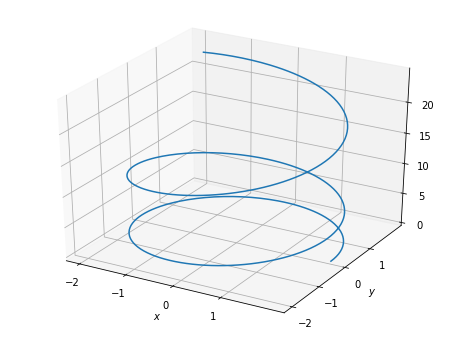

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xticks(np.arange(-2, 2, 1))
plt.yticks(np.arange(-2, 2, 1))
plt.plot(X, Y, Z)

Using the *vector* module from *SymPy*, the vector $\mathbf{r}$ shall be entered in unit vector form.

In [30]:
from sympy.vector import *
N = CoordSys3D('N')

In [31]:
r = 2*cos(3*t)*N.i + 2*sin(3*t)*N.j + t**2*N.k
r

(2*cos(3*t))*N.i + (2*sin(3*t))*N.j + t**2*N.k

Differentiate the vector $\mathbf{r}$ in order to obtain the velocity and the acceleration of the particle at any point in time $t$.

In [32]:
drdt = diff(r)
drdt

(-6*sin(3*t))*N.i + (6*cos(3*t))*N.j + 2*t*N.k

In [33]:
dr2dt2 = diff(r, t, 2)
dr2dt2

(-18*cos(3*t))*N.i + (-18*sin(3*t))*N.j + 2*N.k

Therefore the speed and the acceleration of the particle at $t=1$ is

In [34]:
drdt.subs(t, 1)

(-6*sin(3))*N.i + (6*cos(3))*N.j + 2*N.k

In [35]:
dr2dt2.subs(t, 1)

(-18*cos(3))*N.i + (-18*sin(3))*N.j + 2*N.k

***   
  
by Dr J T Wharton

***